In [64]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import collections


In [65]:
url = 'imdb_com_movie_data.csv'
df = pd.read_csv(url)
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN


In [66]:
df['Budget'] = df['Budget'].str.replace(',', '').str.replace('$', '').astype(float)
df['Collection'] = df['Collection'].str.replace(',', '').str.replace('$', '').astype(float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            24 non-null     object 
 1   Crawl Timestamp    24 non-null     object 
 2   Pageurl            24 non-null     object 
 3   Title              24 non-null     object 
 4   Genres             22 non-null     object 
 5   Release Date       23 non-null     object 
 6   Movie Rating       22 non-null     object 
 7   Review Rating      22 non-null     float64
 8   Movie Run Time     22 non-null     object 
 9   Plot               24 non-null     object 
 10  Cast               22 non-null     object 
 11  Language           24 non-null     object 
 12  Filming Locations  23 non-null     object 
 13  Budget             21 non-null     float64
 14  Collection         22 non-null     float64
 15  Collection Date    4 non-null      object 
dtypes: float64(3), object(13)
me

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...",200000000.0,6.239333e+08,19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...",170000000.0,7.741766e+08,NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...",200000000.0,1.347071e+09,NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA",200000000.0,1.215440e+09,NaN


In [55]:
# split the cast string to tuple of all actors
def split_actors(inp):
    input_string = str(inp)
    actor_list = input_string.split("|")
    actor_tuple = tuple(actor_list)
    return actor_tuple

# make a set of all the different actors using for loop
all_actors = ()
for cast in df.Cast:
    cast_actors_tuple = split_actors(cast)
    all_actors += cast_actors_tuple

# make a list with all the casts stitched together
all_moviecasts_list = list(filter(lambda a: a != "nan", all_actors))
print(all_moviecasts_list)
print("="*288)

# make a set with all the different actors
all_actors_set = set(all_actors)
all_actors_set.remove("nan")
print(all_actors_set)
print("="*288)

# check how many times each actor plays in a movie
occurrences_actors = collections.Counter(all_moviecasts_list)
print(occurrences_actors)

['Robert Downey Jr.', 'Mickey Rourke', 'Gwyneth Paltrow', 'Don Cheadle', 'Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana', 'Chadwick Boseman', 'Michael B. Jordan', "Lupita Nyong'o", 'Danai Gurira', 'Robert Downey Jr.', 'Guy Pearce', 'Gwyneth Paltrow', 'Don Cheadle', 'Edward Norton', 'Liv Tyler', 'Tim Roth', 'William Hurt', 'Brie Larson', 'Samuel L. Jackson', 'Ben Mendelsohn', 'Jude Law', 'Robert Downey Jr.', 'Gwyneth Paltrow', 'Terrence Howard', 'Jeff Bridges', 'Chris Hemsworth', 'Anthony Hopkins', 'Natalie Portman', 'Tom Hiddleston', 'Chris Evans', 'Robert Downey Jr.', 'Scarlett Johansson', 'Sebastian Stan', 'Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Chris Evans', 'Tom Holland', 'Michael Keaton', 'Robert Downey Jr.', 'Marisa Tomei', 'Chris Evans', 'Hugo Weaving', 'Samuel L. Jackson', 'Hayley Atwell', 'Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth', 'Paul Rudd', 'Evangeline Lilly', 'Michael Peña', 'Walton Goggins', 'Paul Rudd', 'Michael D

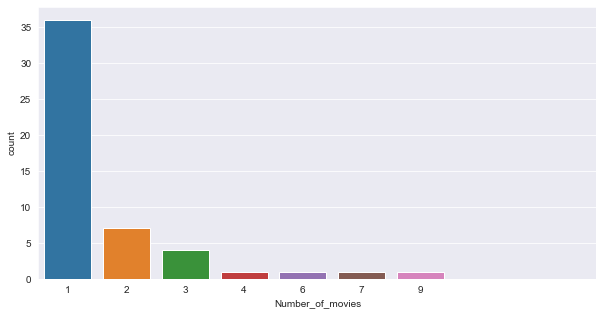

In [56]:
# movies played in bar chart

# convert dictionary to dataframe
movies_per_actor = (pd.DataFrame(list(occurrences_actors.items()),columns = ['Actor','Number_of_movies'])).sort_values(by='Number_of_movies', ascending=False)
movies_per_actor.reset_index(inplace=True, drop=True)

# plot bar chart
fig, ax =plt.subplots(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x=movies_per_actor.Number_of_movies, data=movies_per_actor)
ax.set_xticks([x for x in range(10)])




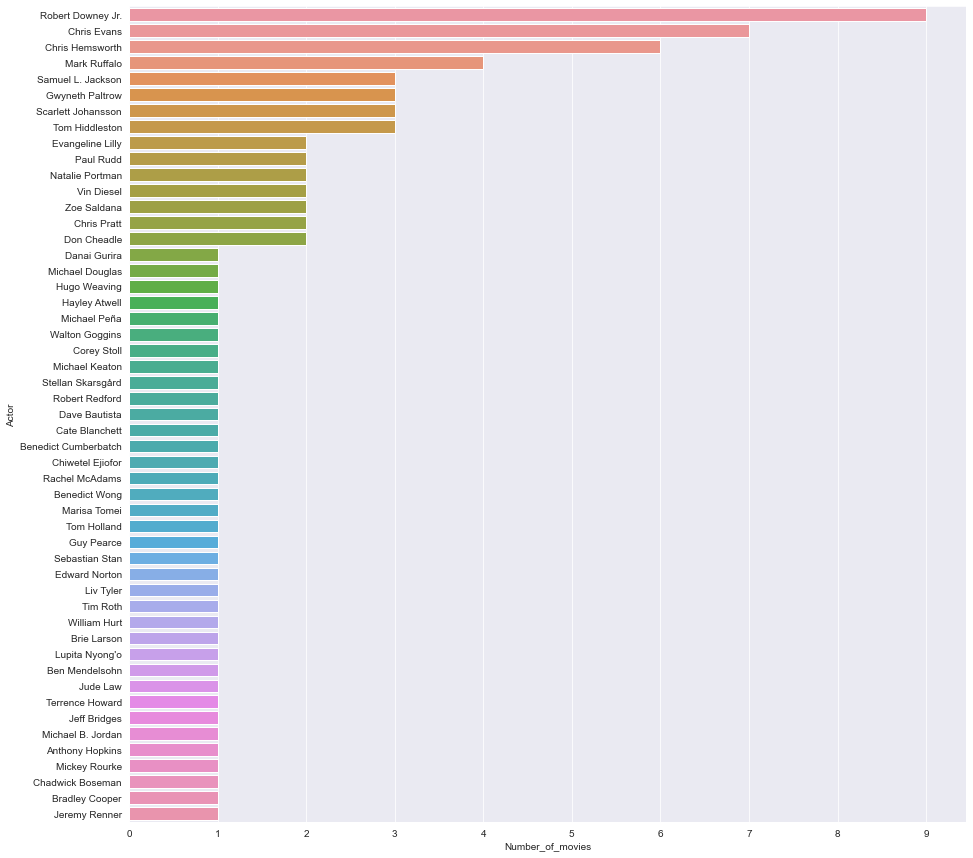

In [57]:
# horizontal bar chart
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(x="Number_of_movies", y="Actor", data=movies_per_actor)
ax.set_xticks([x for x in range(10)])

<AxesSubplot:xlabel='Review Rating', ylabel='Count'>

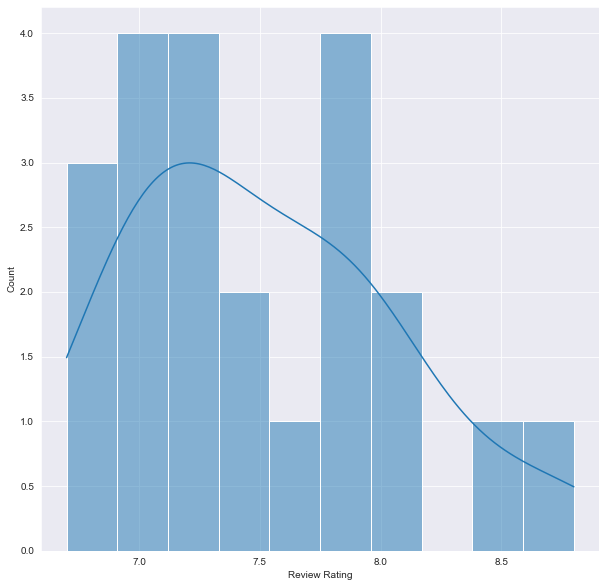

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(x="Review Rating", data=df, kde=True, bins=10)

In [59]:
df['Cast'] = df['Cast'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            24 non-null     object 
 1   Crawl Timestamp    24 non-null     object 
 2   Pageurl            24 non-null     object 
 3   Title              24 non-null     object 
 4   Genres             22 non-null     object 
 5   Release Date       23 non-null     object 
 6   Movie Rating       22 non-null     object 
 7   Review Rating      22 non-null     float64
 8   Movie Run Time     22 non-null     object 
 9   Plot               24 non-null     object 
 10  Cast               24 non-null     object 
 11  Language           24 non-null     object 
 12  Filming Locations  23 non-null     object 
 13  Budget             21 non-null     float64
 14  Collection         22 non-null     float64
 15  Collection Date    4 non-null      object 
dtypes: float64(3), object(13)
me

In [60]:
#check per actor and per movie how much accumulated collections they have gathered
dictionary_actors_profit = {}
for actor in all_actors_set:
    for i, cast in enumerate(df.Cast):
        if actor in cast:
            if actor in dictionary_actors_profit:
                if df.iloc[i][10]:
                    dictionary_actors_profit[actor] += df.iloc[i][14]
            else:
                dictionary_actors_profit[actor] = df.loc[i][14]
print(dictionary_actors_profit)

{'Tom Hiddleston': 1948086884.0, 'Evangeline Lilly': 1142119302.0, 'Rachel McAdams': 677718395.0, 'Don Cheadle': 1839373325.0, 'Michael Peña': 622674139.0, 'Terrence Howard': 585174222.0, 'Michael Keaton': 880166924.0, 'Benedict Wong': 677718395.0, 'Paul Rudd': 1142119302.0, 'Hugo Weaving': 370569774.0, 'Dave Bautista': 863756051.0, 'Tom Holland': 880166924.0, 'Ben Mendelsohn': 1126318317.0, 'Scarlett Johansson': 3387628977.0, 'Jude Law': 1126318317.0, 'Tim Roth': 263427551.0, "Lupita Nyong'o": 1347071259.0, 'Mickey Rourke': 623933331.0, 'Chris Pratt': 1637932651.0, 'Stellan Skarsgård': 644783140.0, 'Hayley Atwell': 370569774.0, 'William Hurt': 263427551.0, 'Robert Redford': 714766572.0, 'Sebastian Stan': 1153304495.0, 'Edward Norton': 263427551.0, 'Chris Evans': 9894311064.0, 'Mark Ruffalo': 6990089439.0, 'Michael Douglas': 519445163.0, 'Walton Goggins': 622674139.0, 'Robert Downey Jr.': 12113689189.0, 'Danai Gurira': 1347071259.0, 'Gwyneth Paltrow': 2424547547.0, 'Michael B. Jordan':

In [61]:
profit_per_actor = (pd.DataFrame(list(dictionary_actors_profit.items()),columns = ['Actor','Collection'])).sort_values(by='Collection', ascending=False)
profit_per_actor.reset_index(inplace=True, drop=True)
profit_per_actor.head()

,Actor,Collection
0,Robert Downey Jr.,1.211369e+10
1,Chris Evans,9.894311e+09
2,Chris Hemsworth,8.084199e+09
3,Mark Ruffalo,6.990089e+09
4,Scarlett Johansson,3.387629e+09


<AxesSubplot:xlabel='Collection', ylabel='Actor'>

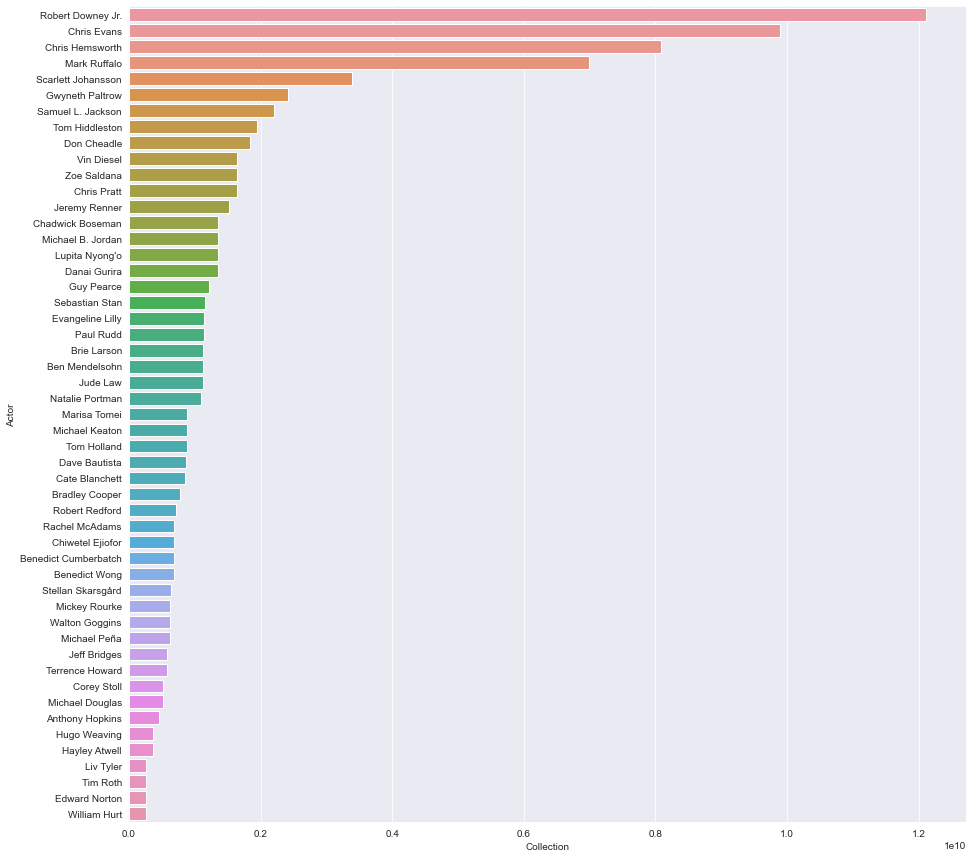

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(x="Collection", y="Actor", data=profit_per_actor)